In [162]:
import numpy as np
import pandas as pd
file_path = '/content/Assignment.xlsx'
df = pd.read_excel('/content/Assignment.xlsx', sheet_name = None)

print(df.keys())

dict_keys(['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv'])


In [163]:
user_details = df['UserDetails.csv']
cooking_sessions = df['CookingSessions.csv']
order_details = df['OrderDetails.csv']

In [164]:
print(user_details)
print("*"*100)
print(cooking_sessions)
print("*"*100)
print(order_details)

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
5    U006    Frank Green   25         Austin        2023-06-15  888-777-6666   
6    U007     Grace King   38         Boston        2023-07-02  999-888-7777   
7    U008      Henry Lee   31          Miami        2023-08-11  101-202-3030   
8    U009    Irene Moore   33         Dallas        2023-09-01  202-303-4040   
9    U010     Jack White   29        Phoenix        2023-10-10  303-404-5050   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.

In [165]:
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'], errors='coerce')
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'], errors='coerce')

In [166]:
order_details['Rating'] = order_details['Rating'].fillna(order_details['Rating'].mean())

In [167]:
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

In [168]:
print(user_details)
print("*"*100)
print(cooking_sessions)
print("*"*100)
print(order_details)

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
5    U006    Frank Green   25         Austin        2023-06-15  888-777-6666   
6    U007     Grace King   38         Boston        2023-07-02  999-888-7777   
7    U008      Henry Lee   31          Miami        2023-08-11  101-202-3030   
8    U009    Irene Moore   33         Dallas        2023-09-01  202-303-4040   
9    U010     Jack White   29        Phoenix        2023-10-10  303-404-5050   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.

#Merging Datasets


In [169]:
Merged_data = pd.merge(cooking_sessions,user_details, on = 'User ID', how = 'left')

In [170]:
Dataframe = pd.merge(Merged_data, order_details, on=['User ID', 'Session ID'], how = 'left')

Relation Between Cooking Sessions and User Orders

In [171]:
orders_per_session = Dataframe.groupby('Session ID')['Order ID'].count().reset_index()
orders_per_session = orders_per_session.rename(columns={'Order ID': 'Order Count'})

In [172]:
average_session_rating = Dataframe.groupby('Session ID')['Rating'].mean().reset_index()
average_session_rating = average_session_rating.rename(columns={'Rating':'Average Session Rating'})

In [173]:
Dataframe = pd.merge(Dataframe, orders_per_session, on='Session ID',how='left')
Dataframe = pd.merge(Dataframe, average_session_rating, on= 'Session ID', how = 'left')
print(Dataframe[['Session ID','Order Count','Average Session Rating']].head())

  Session ID  Order Count  Average Session Rating
0       S001            1                5.000000
1       S002            1                4.000000
2       S003            1                4.285714
3       S004            1                4.000000
4       S005            1                4.000000


In [174]:
popular_dishes = Dataframe.groupby('Dish Name_x')['Order ID'].count().reset_index()
popular_dishes = popular_dishes.sort_values(by = 'Order ID',ascending= False)
print(popular_dishes.head(10))

       Dish Name_x  Order ID
1  Grilled Chicken         4
4        Spaghetti         4
0     Caesar Salad         3
3         Pancakes         2
5    Veggie Burger         2
2          Oatmeal         1


Demographic factors that influence user behavior


In [175]:
age_group_orders = Dataframe.groupby('Age')['Order ID'].count().reset_index()
age_group_orders = age_group_orders.rename(columns={'Order ID': 'Order Count'})

In [176]:
location_orders = Dataframe.groupby('Location')['Order ID'].count().reset_index()
location_orders = location_orders.rename(columns={'Order ID':'Order Count'})

In [177]:
favorite_meal_orders = Dataframe.groupby('Favorite Meal')['Order ID'].count().reset_index()
favorite_meal_orders = favorite_meal_orders.rename(columns={'Order ID': 'Order Count'})

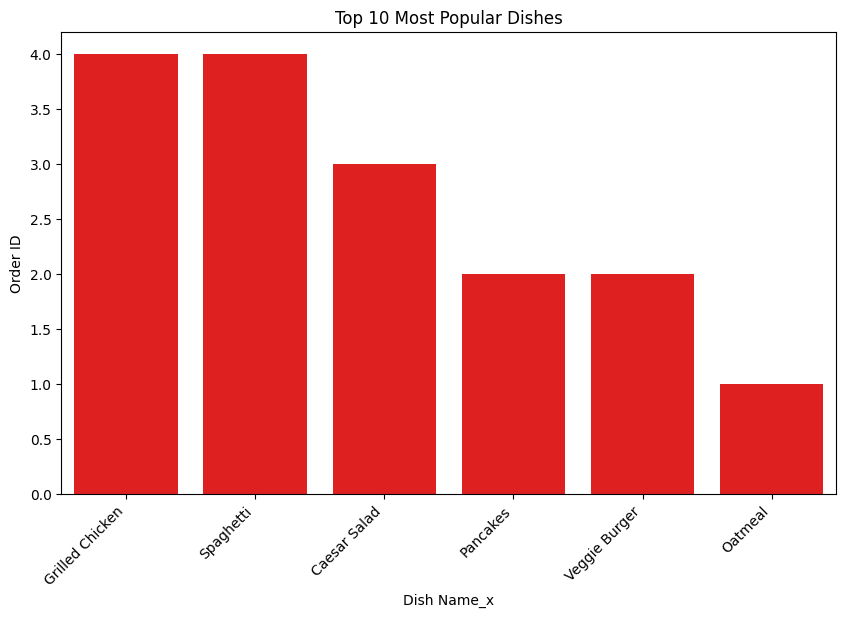

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=popular_dishes.head(10), x='Dish Name_x', y='Order ID', color='red')
plt.xticks(rotation = 45, ha='right')
plt.title('Top 10 Most Popular Dishes')
plt.show()

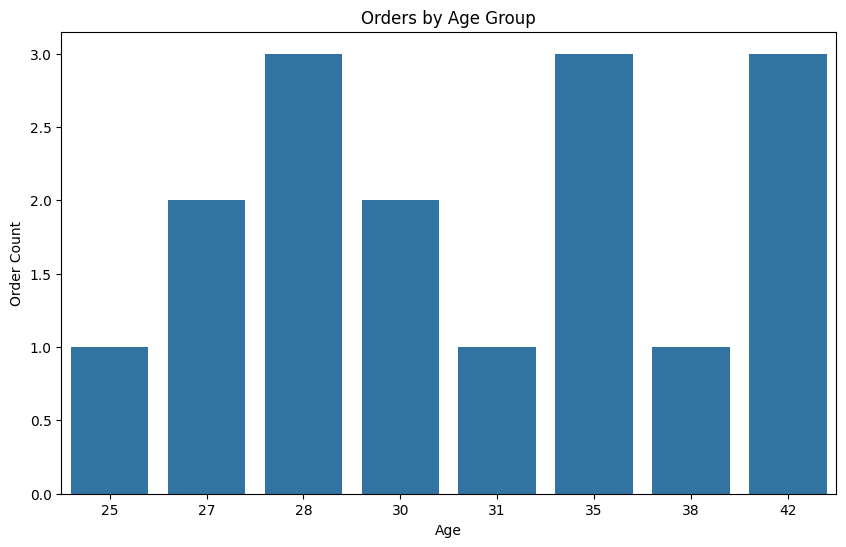

In [179]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_orders, x='Age', y='Order Count')
plt.title('Orders by Age Group')
plt.show()

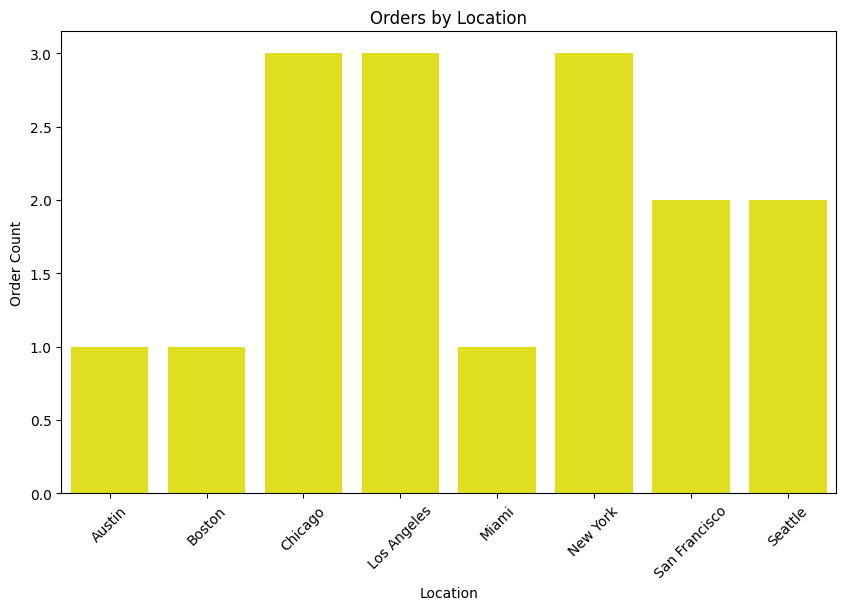

In [180]:
plt.figure(figsize=(10, 6))
sns.barplot(data=location_orders, x='Location', y='Order Count', color= 'Yellow')
plt.title('Orders by Location')
plt.xticks(rotation=45)
plt.show()

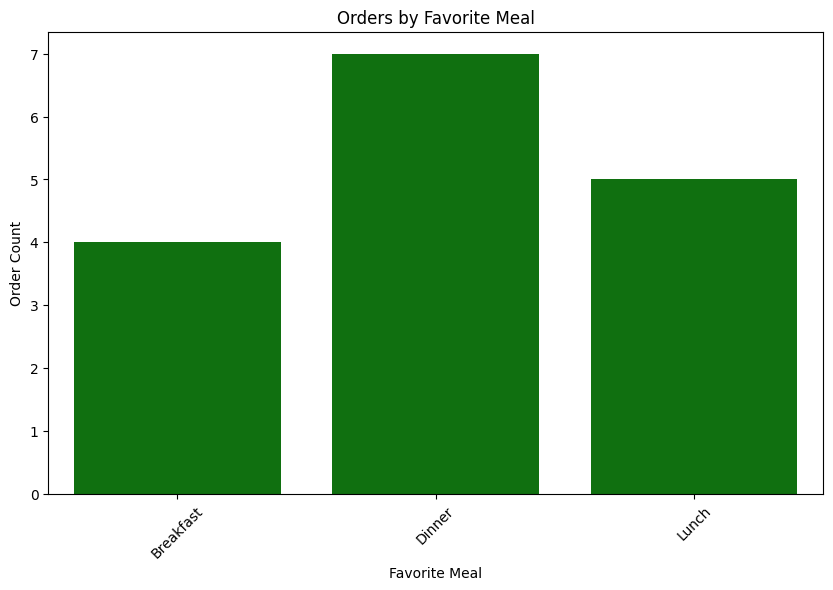

In [181]:
plt.figure(figsize=(10, 6))
sns.barplot(data=favorite_meal_orders, x='Favorite Meal', y='Order Count', color = 'green')
plt.title('Orders by Favorite Meal')
plt.xticks(rotation=45)
plt.show()

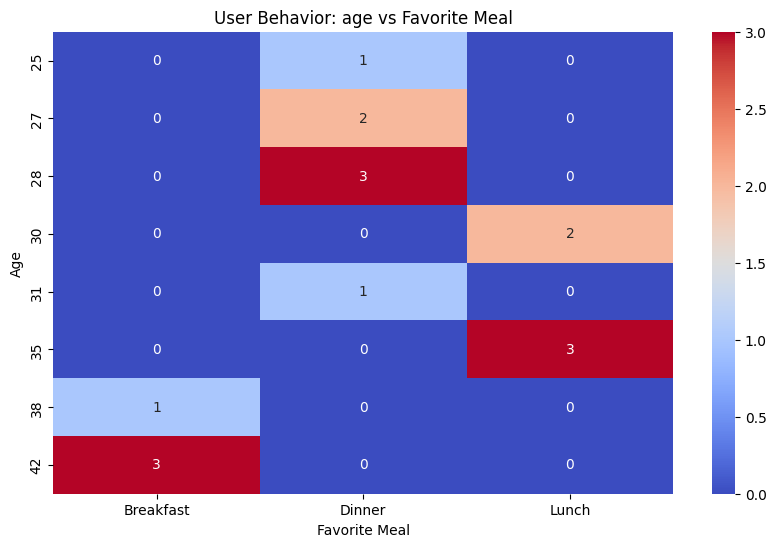

In [182]:
plt.figure(figsize=(10,6))
sns.heatmap(age_favorite_meal, annot = True, cmap='coolwarm')
plt.title('User Behavior: age vs Favorite Meal')
plt.show()

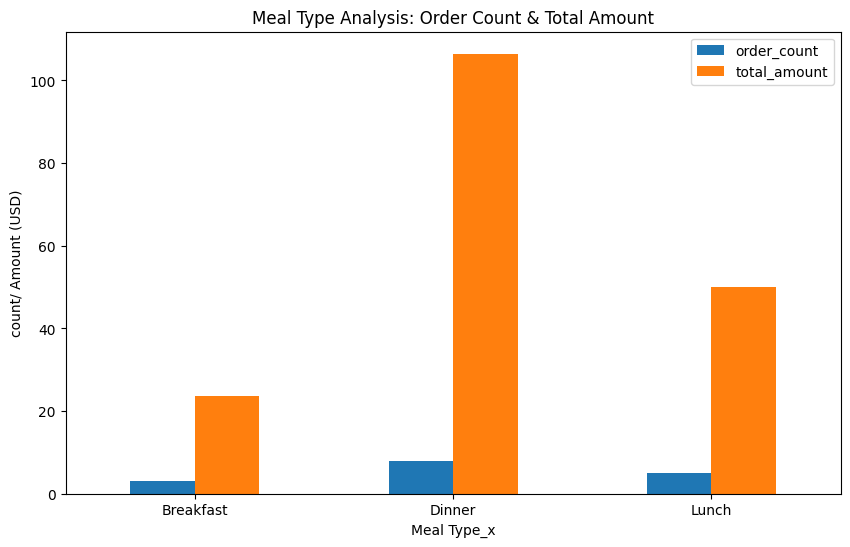

In [183]:
meal_order.set_index('Meal Type_x')[['order_count', 'total_amount']].plot(kind='bar',figsize = (10,6))
plt.title('Meal Type Analysis: Order Count & Total Amount')
plt.xticks(rotation = 0)
plt.ylabel('count/ Amount (USD)')
plt.show()